## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2025, Prof. J.C. Kao, TAs: B. Qu, K. Pang, S. Dong, S. Rajesh, T. Monsoor, X. Yan

In [34]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x + 2x^2 -3x^3 + \epsilon$

In [38]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x + 2*x**2 - 3*x**3 + np.random.normal(loc=0, scale=0.05, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

Text(0, 0.5, '$y$')

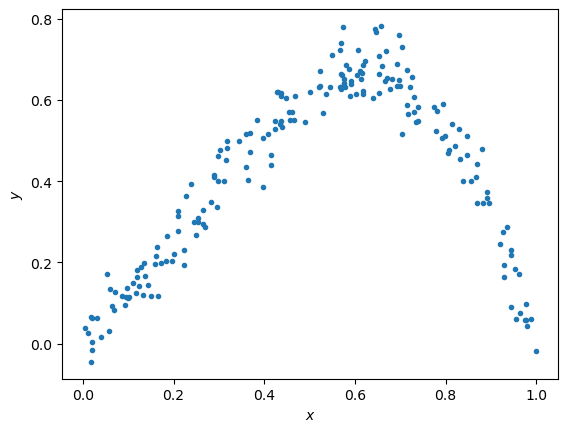

In [32]:
#added line by me
plt.show(f)

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) The code generates a uniform distribution, as we can see in the above graph and the average for the data points. Additionally, according to the code for x, we use "np.random.uniform" for generating our distribution therefore we generate a uniform distribution with values between 0 and 1.

(2) The additive noise generated has a normal distribution, with a mean of 0 and a standard deviation of 0.05. The np.random library did add this as noise to the y output, howver, the general distribution of x on y is x + 2x^2 - 3x^3.

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [80]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

#theta = np.zeros(2) # please modify this line
theta = np.linalg.inv((xhat.T).T.dot(xhat.T)).dot((xhat.T).T.dot(y))
# ================== #
# END YOUR CODE HERE #
# ================== #

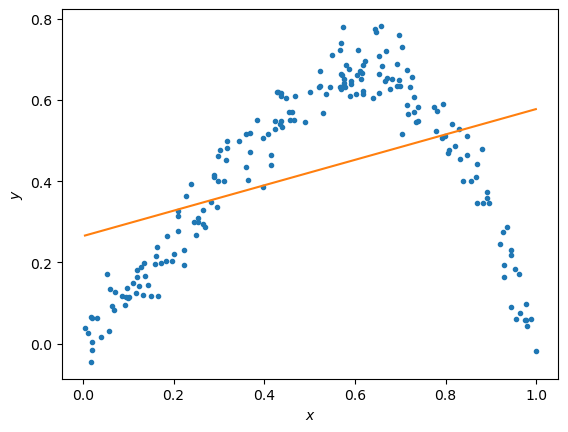

In [82]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))
plt.show() # had to add

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The linear model very clearly underfits the data. Based on observation, there is an inverse parabolic path with the general distribution of the data points indicating that a polynomial model would be better. Thus, the linear regression model underfits the data and doesn't capture the shape of the data points very well.

(2) We can improve the fitting of the model by changing the complexity. We can include more polynomial terms. By increasing the number of terms within theta to fit the number of polynomial terms we want, we can minimize the loss and have a better fit to the data.

### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [91]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.
for i in range(1, N+1):
    xhat = np.ones_like(x)
    #NOTE: ones_like() function is used to return an array of ones, 1 , with the same shape as a given array
    for j in range(1, i+1):
        xhat = np.vstack((x**j, xhat))
    x_transpose = xhat.T
    #theta = np.linalg.inv((xhat.T).T.dot(xhat.T)).dot((xhat.T).T.dot(y))
    theta = np.linalg.inv(x_transpose.T.dot(x_transpose)).dot(x_transpose.T.dot(y))
    xhats.append(x_transpose)
    thetas.append(theta)

#pass

# ================== #
# END YOUR CODE HERE #
# ================== #

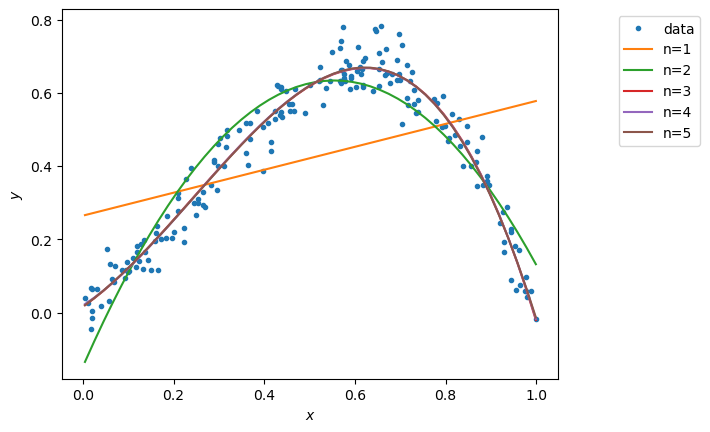

In [99]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)
plt.show()

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [101]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
#pass
for i in range(N):
    difference = y - xhats[i].dot(thetas[i])
    training_errors.append(difference.T.dot(difference)/num_train)

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.041899148752619, 0.005860281754804519, 0.002269334389195937, 0.0022681538153602717, 0.0022670775543125817]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) The 5th order polynomial has the best training error based on the values. Even if it is only marginally better by approximately 0.000001 compared to the other lower order polynomials.

(2) The 5th order polynomial will have the lowest training error in comparison to the lower order polynomials because as the complexity increases, the extra order will allow us to reduce the loss. However, this can make the model more prone to overfitting and do worse with generalization. With each added order, we reduce the loss by increasing the complexity but at the risk of overfitting.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

In [104]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x + 2*x**2 - 3*x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

Text(0, 0.5, '$y$')

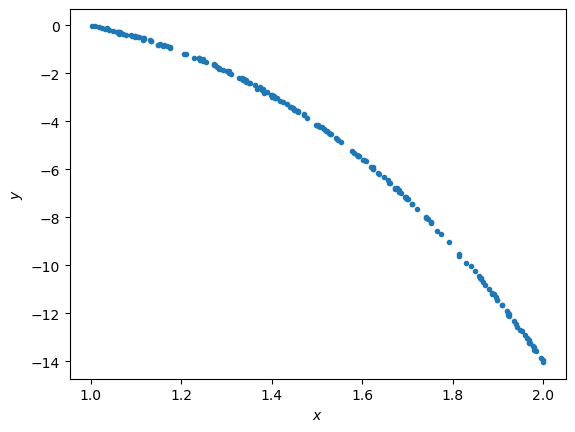

In [106]:
plt.show()

In [108]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

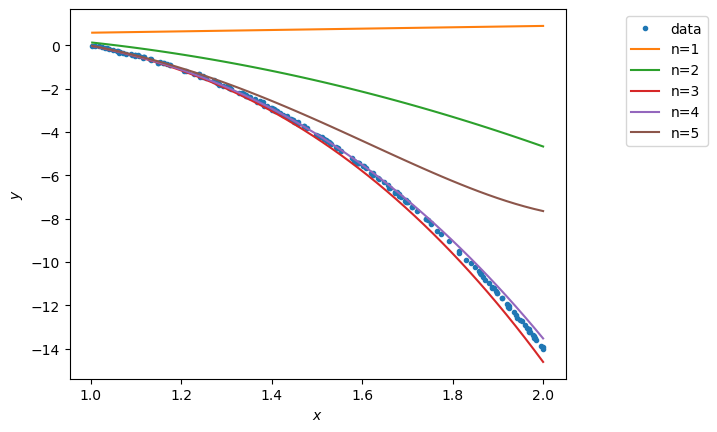

In [114]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)
#added line
plt.show()

In [120]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
#pass
for i in range(N):
    difference = y - xhats[i].T.dot(thetas[i])
    testing_errors.append((difference.T.dot(difference))/num_train)
# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [54.246317716012214, 18.91115921752976, 0.08693862570503448, 0.030429668694778193, 5.954356338564789]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) The 4th order polynomial has the best testing error of 0.030429668694778193 compared to all of the other polynomial orders. 

(2) The polynomial order of 5 doesn't generalize well because the extra order of magnitude overfitted to the training data. With higher order polynomials, the training performance will eventually plateau, but the testing performance may decrease as higher complexity models have a tendency to overfit the training data. This means that higher order models are prone to not generalize well to unseen data. The polynomial of order 4 may try to also fit the noise into the training data which can also contribute to the overfitting and poor generalization.